<a href="https://colab.research.google.com/github/frogbysachs/LASA-Data-Science/blob/Unit-7/Frogby_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

*Polynomial elements can become very useful for accurately fitting your model to the data you're working with, because polynomial components are part of the Taylor series, which- as you include more and more terms from the Taylor series- approaches a 100% accurate polynomial representation of non-algebraic functions.*

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

*If your data seems to have a pretty simple relationship, you probably shouldn't include high degree polynomial elements-- both for convenience reasons, as it'll take longer for the code to run and be more difficult to interpret, and because a more compolicated model really leans into overfitting, meaning it seems like we're overly confident in our predictions.*

**Task3**:

What's the point of using b splines?

*B splines are a useful way to get a similar effect to polynomial elements (because it's essentially just doing piecewise functions that hopefully look pretty smooth at the median points), without the issue of overfitting, because we can get a complicated-looking curve with piecewise quadratic functions instead of having to go up to quartic or higher to get that similar-looking curve.*

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

*A Gaussian Process is a probability distribution over a set of data so that when you input an x value, you don't just get one y value out of it- you get a probability distribution for a range of reasonable y values. It does this by selecting multiple functions that could reasonably fit the data, and summing them to get the closest fit. Importantly, each data point ultimately is used as a predictor for the other data points.*

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-icoj9uo0
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-icoj9uo0
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev17+g0caf0962-py3-none-any.whl size=1260150 sha256=41771ce3e74438d1dcf6069493026065ebc4b31e44116303a5df2a1a156a273e
  Stored in directory: /tmp/pip-ephem-wheel-cache-sopq75fo/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.3 MB/s eta 0:00:00
   ━

In [ ]:
url = "https://raw.githubusercontent.com/frogbysachs/data-science-fundamentals/refs/heads/main/Data/howell.csv"
rawdata = pd.read_csv(url)
rawdata

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0
...,...,...,...,...
539,145.415,31.127751,17.0,1
540,162.560,52.163080,31.0,1
541,156.210,54.062497,21.0,0
542,71.120,8.051258,0.0,1


<Axes: xlabel='height', ylabel='weight'>

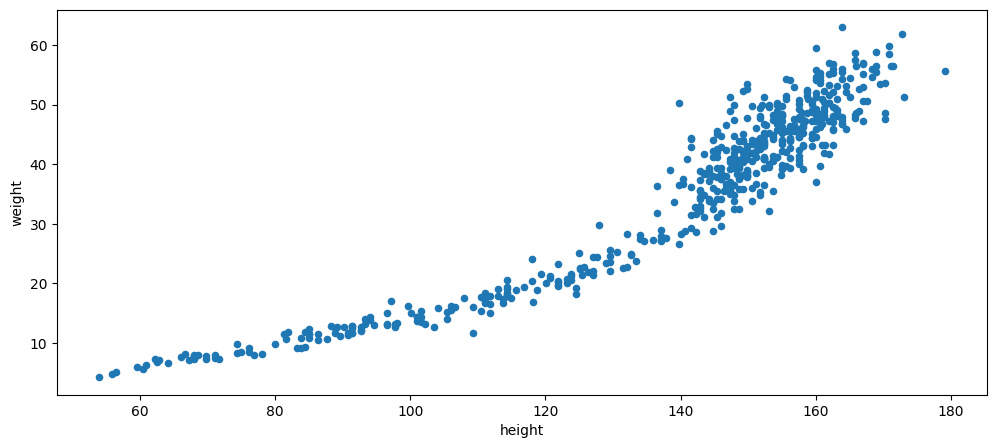

In [ ]:
rawdata.plot(x="height", y="weight", figsize=(12, 5), kind="scatter")

In [ ]:
num_knots = 6
knots = np.linspace(53, 180, num_knots+2)[1:-1]
model_spline = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", rawdata, family="negativebinomial")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


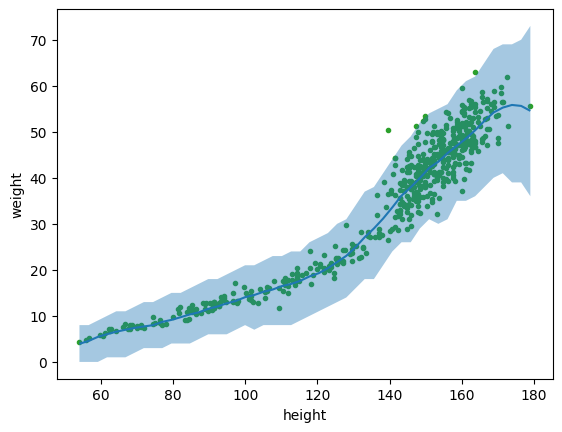

In [ ]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps= True)
plt.plot(rawdata.height, rawdata.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

*My favorite graph was the one called "fit and possible forecasts" that zoomed in on 2005-2040, because it made the seasonality of CO2 level recordings much more apparent to me, and I thought it was super cool that the model was good enough that all of the sample posterior predictions reflected a near-identical zigzaggy data trend.*

###Code that I didn't use below (parking lot)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


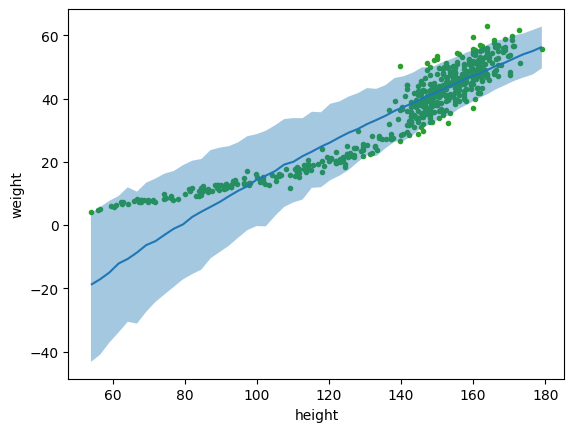

In [ ]:
#code that i didn't use
bmb.interpret.plot_predictions(model_dis, idata_dis, "height", pps= True)
plt.plot(rawdata.height, rawdata.weight, "C2.", zorder=-3)

In [ ]:
num_knots = 6
knots = np.linspace(0, 23, num_knots+2)[1:-1]
model_spline = bmb.Model("rented ~ bs(hour, degree=3, knots=knots)", bikes, family="negativebinomial")
idata_spline = model_spline.fit()


bmb.interpret.plot_predictions(model_spline, idata_spline, "hour", pps= True)
plt.plot(bikes.hour, bikes.rented, "C2.", zorder=-3)